# Certainty Task Data

## Organizing the log data for analysis

Import the packages

In [135]:
import csv
import os
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import FuncAnimation
from pandas.plotting import autocorrelation_plot
import matplotlib.animation as animation
from matplotlib import style
%matplotlib inline

# os.chdir("data")

os.getcwd()

'C:\\Users\\tul00635\\Downloads\\Certainty Data\\data'

First read in the text file (but first save the .log file as .txt file), then convert to .csv

In [262]:
data = pd.read_csv('SAN111.txt', error_bad_lines=False)
data.to_csv (r'SAN111_1.csv',sep="	", index=None)

b'Skipping line 3: expected 4 fields, saw 37\nSkipping line 8: expected 4 fields, saw 32\nSkipping line 9: expected 4 fields, saw 32\nSkipping line 10: expected 4 fields, saw 32\nSkipping line 11: expected 4 fields, saw 32\nSkipping line 12: expected 4 fields, saw 32\nSkipping line 13: expected 4 fields, saw 33\nSkipping line 14: expected 4 fields, saw 32\nSkipping line 15: expected 4 fields, saw 32\nSkipping line 16: expected 4 fields, saw 32\nSkipping line 17: expected 4 fields, saw 32\nSkipping line 18: expected 4 fields, saw 32\nSkipping line 19: expected 4 fields, saw 32\nSkipping line 20: expected 4 fields, saw 32\nSkipping line 21: expected 4 fields, saw 32\nSkipping line 22: expected 4 fields, saw 32\nSkipping line 23: expected 4 fields, saw 32\nSkipping line 24: expected 4 fields, saw 32\nSkipping line 25: expected 4 fields, saw 32\nSkipping line 26: expected 4 fields, saw 32\nSkipping line 27: expected 4 fields, saw 32\nSkipping line 28: expected 4 fields, saw 32\nSkipping li

In [6]:
data = pd.read_csv('SAN102.txt', error_bad_lines=False)
data.to_csv (r'SAN102_1.csv',sep="	", index=None)

b'Skipping line 3: expected 4 fields, saw 37\nSkipping line 8: expected 4 fields, saw 32\nSkipping line 9: expected 4 fields, saw 32\nSkipping line 10: expected 4 fields, saw 32\nSkipping line 11: expected 4 fields, saw 32\nSkipping line 12: expected 4 fields, saw 32\nSkipping line 13: expected 4 fields, saw 33\nSkipping line 14: expected 4 fields, saw 32\nSkipping line 15: expected 4 fields, saw 32\nSkipping line 16: expected 4 fields, saw 32\nSkipping line 17: expected 4 fields, saw 32\nSkipping line 18: expected 4 fields, saw 32\nSkipping line 19: expected 4 fields, saw 32\nSkipping line 20: expected 4 fields, saw 32\nSkipping line 21: expected 4 fields, saw 32\nSkipping line 22: expected 4 fields, saw 32\nSkipping line 23: expected 4 fields, saw 32\nSkipping line 24: expected 4 fields, saw 32\nSkipping line 25: expected 4 fields, saw 32\nSkipping line 26: expected 4 fields, saw 32\nSkipping line 27: expected 4 fields, saw 32\nSkipping line 28: expected 4 fields, saw 32\nSkipping li

### Read back in the data as a csv

In [263]:
data = pd.read_csv("SAN111_1.csv")
data.columns=['Frames']

In [7]:
data = pd.read_csv("SAN102_1.csv")
data.columns=['Frames']

### Look in the df to find only the values that contain information about the certainty ratings, the video clip that was shown, and the role that was given

In [264]:
contain_values = data[data['Frames'].str.contains('% certain|movie|Imagine|Rect: size')]
contain_values

,Frames
1560,162.8904 \tEXP \tunnamed TextStim: text = 'Ima...
1567,176.1184 \tEXP \tVidClip: movie = 'MindhunterS...
1570,176.1184 \tEXP \tunnamed TextStim: text = 'Ima...
1575,176.1184 \tEXP \tunnamed TextStim: text = '0% ...
1584,176.1184 \tEXP \tunnamed Rect: size = array([0...
...,...
525255,3852.3603 \tEXP \tunnamed Rect: size = array([...
525256,3852.3770 \tEXP \tunnamed TextStim: text = '35...
525258,3852.3770 \tEXP \tunnamed Rect: size = array([...
525260,3852.4086 \tEXP \tunnamed TextStim: text = '35...


In [265]:
contain_values.to_csv (r'SAN111_2.csv',index=None)
os.remove("SAN111_1.csv")

In [9]:
contain_values.to_csv (r'SAN102_1_1.csv',index=None)
os.remove("SAN102_1.csv")

## Get rid of unnecessary strings in the text and replace with blanks
Then save to a csv

In [266]:
text = open("SAN111_2.csv", "r")
text = ''.join([i for i in text]) \
    .replace("EXP", "")

text = ''.join([i for i in text]).replace("unnamed", "")
text = ''.join([i for i in text]).replace("Rect: size = array", "")
text = ''.join([i for i in text]).replace("TextStim:", "")
text = ''.join([i for i in text]).replace("text = '", "")
text = ''.join([i for i in text]).replace("'", "")
text = ''.join([i for i in text]).replace("\t", "")
# text = ''.join([i for i in text]).replace("\n", "")

In [10]:
text = open("SAN102_1_1.csv", "r")
text = ''.join([i for i in text]) \
    .replace("EXP", "")

text = ''.join([i for i in text]).replace("unnamed", "")
text = ''.join([i for i in text]).replace("Rect: size = array", "")
text = ''.join([i for i in text]).replace("TextStim:", "")
text = ''.join([i for i in text]).replace("text = '", "")
text = ''.join([i for i in text]).replace("'", "")
text = ''.join([i for i in text]).replace("\t", "")
# text = ''.join([i for i in text]).replace("\n", "")

In [267]:
x = open("outputSAN111.csv","w")
x.writelines(text)
x.close()

In [11]:
x = open("outputSAN102.csv","w")
x.writelines(text)
x.close()

## Get rid of the frame numbers preceding the certainty ratings

In [268]:
df = pd.read_csv("outputSAN111.csv")
df.columns=["Frames"]
x = open("outputSAN111_1.csv","w")
start=0
stop=9

search="% certain"
search1 = "(["
frames = df['Frames']
neg="-"
for i in frames:
   # if search in i or search1 in i:
    if search in i:
        strObj = i[0:start:] + i[stop +1::]
#         print(strObj)
        x.writelines("\n" + strObj)
#         if search in i:
#             x.writelines("\n" + "NA")
    elif search1 in i and neg in i:
        strObj = "Guilty"
        x.writelines("\n" + strObj)
    elif search1 in i and neg not in i:
        strObj="Innocent"
        x.writelines("\n" + strObj)
    else:
        x.writelines("\n" + i)
#         print("False")

x.close()

In [12]:
df = pd.read_csv("outputSAN102.csv")
df.columns=["Frames"]
x = open("outputSAN102_1.csv","w")
start=0
stop=9

search="% certain"
search1 = "(["
frames = df['Frames']
neg="-"
for i in frames:
   # if search in i or search1 in i:
    if search in i:
        strObj = i[0:start:] + i[stop +1::]
#         print(strObj)
        x.writelines("\n" + strObj)
#         if search in i:
#             x.writelines("\n" + "NA")
    elif search1 in i and neg in i:
        strObj = "Guilty"
        x.writelines("\n" + strObj)
    elif search1 in i and neg not in i:
        strObj="Innocent"
        x.writelines("\n" + strObj)
    else:
        x.writelines("\n" + i)
#         print("False")

x.close()

In [269]:
text = open("outputSAN111_1.csv", "r")
text = ''.join([i for i in text]).replace("% certain", "")
# os.remove('output.csv')
x = open("outputSAN111_1_1.csv","w")

x.writelines(text)
x.close()

In [13]:
text = open("outputSAN102_1.csv", "r")
text = ''.join([i for i in text]).replace("% certain", "")
# os.remove('output.csv')
x = open("outputSAN102_1_1.csv","w")

x.writelines(text)
x.close()

## Make newly organized csv into a series of lists 

In [270]:
data = pd.read_csv("outputSAN111_1_1.csv")
data.columns=["Frames"]

df = data['Frames'].tolist()
df[1]
df[3] != "Innocent"

False

In [23]:
data = pd.read_csv("outputSAN102_1_1.csv")
data.columns=["Frames"]

df = data['Frames'].tolist()
df[1]
df[3] != "Innocent"

False

## Mock up a loop we can use to get rid of the half-frame ratings (i.e., a 0-1 rating in the middle of a frame)

In [145]:
li = ["imagine you are a ", "movie = mindhunter","imagine you are a detetctive",  "  0", "Innocent", "  0", "  1", 'Innocent',"  0","Guilty", "  0", "  1", "Innocent"]
x=0
img = "imagine"
mov = "movie"
for i in li:
    nextInd = li.index(i, x) + 1 
    ind = li.index(i,x)
    print("i = ", i)
    print("i index = ", ind)
    print("next index=", nextInd)
#     print("next value = ", li[nextInd])
    if img not in i:
        if mov not in i:
            if i is not 'Innocent':
                if i is not 'Guilty':
                    print("i is a number")
                    if li[nextInd] is not "Innocent":
                        print("next i is not innocent")
                        if li[nextInd] is not "Guilty":
                            print("next i is also not guilty")
#     if i == "  0" and li[ind+1] == "  1":
                            del li[ind]
                            print("new list = ", li)
    x+=1
        
li

i =  imagine you are a 
i index =  0
next index= 1
i =  movie = mindhunter
i index =  1
next index= 2
i =  imagine you are a detetctive
i index =  2
next index= 3
i =    0
i index =  3
next index= 4
i is a number
i =  Innocent
i index =  4
next index= 5
i =    0
i index =  5
next index= 6
i is a number
next i is not innocent
next i is also not guilty
new list =  ['imagine you are a ', 'movie = mindhunter', 'imagine you are a detetctive', '  0', 'Innocent', '  1', 'Innocent', '  0', 'Guilty', '  0', '  1', 'Innocent']
i =  Innocent
i index =  6
next index= 7
i =    0
i index =  7
next index= 8
i is a number
next i is not innocent
i =  Guilty
i index =  8
next index= 9
i =    0
i index =  9
next index= 10
i is a number
next i is not innocent
next i is also not guilty
new list =  ['imagine you are a ', 'movie = mindhunter', 'imagine you are a detetctive', '  0', 'Innocent', '  1', 'Innocent', '  0', 'Guilty', '  1', 'Innocent']
i =  Innocent
i index =  10
next index= 11


['imagine you are a ',
 'movie = mindhunter',
 'imagine you are a detetctive',
 '  0',
 'Innocent',
 '  1',
 'Innocent',
 '  0',
 'Guilty',
 '  1',
 'Innocent']

## Apply to our df

In [271]:
x=0
img = "Imagine"
mov = "movie"
for i in df:
    nextInd = df.index(i, x) + 1 
    ind = df.index(i,x)
#     print("i = ", i)
#     print("i index = ", ind)
#     print("next index=", nextInd)
#     print("next value = ", li[nextInd])
    if img not in i:
        if mov not in i:
            if i != 'Innocent':
                if i != 'Guilty':
#                     print("i is a number")
                    if df[nextInd] != "Innocent":
#                         print("next i is not innocent")
                        if df[nextInd] != "Guilty":
#                             print("next i is also not guilty")
#     if i == "  0" and li[ind+1] == "  1":
                            del df[ind]
#                             print("new list = ", li)
    x+=1



In [229]:
x=0
img = "Imagine"
mov = "movie"
for i in df:
    nextInd = df.index(i, x) + 1 
    ind = df.index(i,x)
#     print("i = ", i)
#     print("i index = ", ind)
#     print("next index=", nextInd)
#     print("next value = ", li[nextInd])
    if img not in i:
        if mov not in i:
            if i != 'Innocent':
                if i != 'Guilty':
#                     print("i is a number")
                    if df[nextInd] != "Innocent":
#                         print("next i is not innocent")
                        if df[nextInd] != "Guilty":
#                             print("next i is also not guilty")
#     if i == "  0" and li[ind+1] == "  1":
                            del df[ind]
#                             print("new list = ", li)
    x+=1



Just to check how the df looks

In [47]:
df1 = pd.DataFrame(df)
df1.to_csv("output1.csv")

In [17]:
df1 = pd.DataFrame(df)
df1.to_csv("outputSAN102_1_1_1.csv")

## Find all iterations of "movie" -> this will help us parse out the ratings for all of the different videos

Find the index of each iteration in the list

In [272]:
indices = [i for i, s in enumerate(df) if 'movie' in s]
print(indices)

[0, 34931, 62486, 86779, 136802, 192101, 232656, 263891, 297670]


### Then make a bunch of lists - one will have all of the numerical ratings, one will have the Innocent/Guilty status, one will have the movie and role information

These will all be lists of strings - convert the ratings lists to integers

In [273]:
vid1 = df[(indices[0]+2):(indices[1]-2)]
vid1Ratings = vid1[0::2]
for i in range(0, len(vid1Ratings)):
    vid1Ratings[i] = int(vid1Ratings[i])
vid1Status = vid1[1::2]
vid1Info = df[(indices[0]):(indices[0]+2)]

vid2 = df[(indices[1]+2):(indices[2]-2)]
vid2Ratings = vid2[0::2]
for i in range(0, len(vid2Ratings)):
    vid2Ratings[i] = int(vid2Ratings[i])
vid2Status = vid2[1::2]
vid2Info = df[(indices[1]-1):(indices[1]+2)]

vid3 = df[(indices[2]+2):(indices[3]-2)]
vid3Ratings = vid3[0::2]
for i in range(0, len(vid3Ratings)):
    vid3Ratings[i] = int(vid3Ratings[i])
vid3Status = vid3[1::2]
vid3Info = df[(indices[2]-1):(indices[2]+2)]

vid4 = df[(indices[3]+2):(indices[4]-2)]
vid4Ratings = vid4[0::2]
for i in range(0, len(vid4Ratings)):
    vid4Ratings[i] = int(vid4Ratings[i])
vid4Status = vid4[1::2]
vid4Info = df[(indices[3]-1):(indices[3]+2)]

vid5 = df[(indices[4]+2):(indices[5]-2)]
vid5Ratings = vid5[0::2]
for i in range(0, len(vid5Ratings)):
    vid5Ratings[i] = int(vid5Ratings[i])
vid5Status = vid5[1::2]
vid5Info = df[(indices[4]-1):(indices[4]+2)]

vid6 = df[(indices[5]+2):(indices[6]-2)]
vid6Ratings = vid6[0::2]
for i in range(0, len(vid6Ratings)):
    vid6Ratings[i] = int(vid6Ratings[i])
vid6Status = vid6[1::2]
vid6Info = df[(indices[5]-1):(indices[5]+2)]

vid7 = df[(indices[6]+2):(indices[7]-2)]
vid7Ratings = vid7[0::2]
for i in range(0, len(vid7Ratings)):
    vid7Ratings[i] = int(vid7Ratings[i])
vid7Status = vid7[1::2]
vid7Info = df[(indices[6]-1):(indices[6]+2)]

vid8 = df[(indices[7]+2):(indices[8]-2)]
vid8Ratings = vid8[0::2]
for i in range(0, len(vid8Ratings)):
    vid8Ratings[i] = int(vid8Ratings[i])
vid8Status = vid8[1::2]
vid8Dict = dict(zip(vid8Ratings, vid8Status))

vid8Info = df[(indices[7]-1):(indices[7]+2)]

vid9 = df[(indices[8]+2):]
vid9Ratings = vid9[0::2]
for i in range(0, len(vid9Ratings)):
    vid9Ratings[i] = int(vid9Ratings[i])
# vid9Ratings = list(map(int, vid9Ratings))
vid9Status = vid9[1::2]
vid9Dict = dict(zip(vid9Status, vid9Ratings))
vid9Info = df[(indices[8]-1):(indices[8]+2)]

In [274]:
vid8Ratings

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Get indices for each video

In [275]:
cert1Index = []
cert2Index = []
cert3Index = []
cert4Index = []
cert5Index = []
cert6Index = []
cert7Index = []
cert8Index = []
cert9Index = []

index=0
for i in vid1Ratings:
    index+=1
    cert1Index.append(index)

index=0
    
for i in vid2Ratings:
    index+=1
    cert2Index.append(index)


index=0
for i in vid3Ratings:
    index+=1
    cert3Index.append(index)


index=0
    
for i in vid4Ratings:
    index+=1
    cert4Index.append(index)


index=0
    
for i in vid5Ratings:
    index+=1
    cert5Index.append(index)

index=0

for i in vid6Ratings:
    index+=1
    cert6Index.append(index)

index=0

for i in vid7Ratings:
    index+=1
    cert7Index.append(index)
    
index=0

for i in vid8Ratings:
    index+=1
    cert8Index.append(index)
    
index=0

for i in vid9Ratings:
    index+=1
    cert9Index.append(index)

## Make Guilty ratings values negative for plotting


In [276]:
# stat1 = df[vid1Status]
# rat1 = df[vid1Ratings]
# stat2 = df[vid2Status]
# rat2 = df[vid2Ratings]
# stat3 = df[vid3Status]
# rat3 = df[vid3Ratings]
# stat4 = df[vid4Status]
# rat4 = df[vid4Ratings]
# stat5 = df[vid5Status]
# rat5 = df[vid5Ratings]
# stat6 = df[vid6Status]
# rat6 = df[vid6Ratings]
# stat7 = df[vid7Status]
# rat7 = df[vid7Ratings]
# stat8 = df[vid8Status]
# rat8 = df[vid8Ratings]
# stat9 = df[vid9Status]
# rat9 = df[vid9Ratings]

y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
y7=[]
y8=[]
y9=[]

In [277]:
#Lists 1 - 4
for i, c in zip(vid1Ratings, vid1Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y1.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y1.append(y)

for i, c in zip(vid2Ratings, vid2Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y2.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y2.append(y)
        
for i, c in zip(vid3Ratings, vid3Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y3.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y3.append(y)
    
for i, c in zip(vid4Ratings, vid4Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y4.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y4.append(y)

In [278]:
#Lists 5 - 9
for i, c in zip(vid5Ratings, vid5Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y5.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y5.append(y)

for i, c in zip(vid6Ratings, vid6Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y6.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y6.append(y)
        
for i, c in zip(vid7Ratings, vid7Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y7.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y7.append(y)
    
for i, c in zip(vid8Ratings, vid8Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y8.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y8.append(y)
    
for i, c in zip(vid9Ratings, vid9Status):
    if c == "Guilty":
#         print("c is guilty")
#         print("c= ", c)
        y = i*(-1)
#         print("y = ", y)
        y9.append(y)
    if c != "Guilty":
#         print("c is not guilty")
#         print("c = ", c)
        y = i
#         print("y =", y)
        y9.append(y)

## Save these lists as a csv

In [279]:
os.remove('outputSAN111.csv')
os.remove('outputSAN111_1.csv')

from itertools import zip_longest
d = [vid1Info, cert1Index,y1, vid1Ratings, vid1Status, vid2Info,cert2Index, y2,vid2Ratings, vid2Status, vid3Info,cert3Index, \
     y3, vid3Ratings, vid3Status, vid4Info, cert4Index, y4, vid4Ratings, vid4Status, vid5Info, cert5Index, y5, vid5Ratings, \
     vid5Status, vid6Info, cert6Index, y6, vid6Ratings, vid6Status, vid7Info,cert7Index,y7, vid7Ratings, vid7Status, \
     vid8Info,cert8Index,y8, vid8Ratings, vid8Status, vid9Info,cert9Index, y9, vid9Ratings, vid9Status]
export_data = zip_longest(*d, fillvalue = '')
with open('outputSAN111.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Video1Info","Vid1Index","Vid1ConvRatings", "Video1Ratings","Video1Status", "Video2Info", "Vid2Index", \
                   "Vid2ConvRatings","Video2Ratings", "Video2Status", "Video3Info","Vid3Index","Vid3ConvRatings", \
                   "Video3Ratings", "Video3Status","Video4Info","Vid4Index","Vid4ConvRatings", "Video4Ratings", \
                   "Video4Status", "Video5Info","Vid5Index", "Vid5ConvRatings","Video5Ratings", "Video5Status", \
                   "Video6Info","Vid6Index","Vid6ConvRatings", "Video6Ratings","Video6Status", "Video7Info", \
                   "Vid7Index", "Vid7ConvRatings", "Video7Ratings", "Video7Status", "Video8Info","Vid8Index", \
                   "Vid8ConvRatings","Video8Ratings", "Video8Status", "Video9Info","Vid9Index","Vid9ConvRatings", \
                   "Video9Ratings", "Video9Status"))
      wr.writerows(export_data)
myfile.close()

In [239]:
os.remove('outputSAN102.csv')

from itertools import zip_longest
d = [vid1Info, cert1Index,y1, vid1Ratings, vid1Status, vid2Info,cert2Index, y2,vid2Ratings, vid2Status, vid3Info,cert3Index, \
     y3, vid3Ratings, vid3Status, vid4Info, cert4Index, y4, vid4Ratings, vid4Status, vid5Info, cert5Index, y5, vid5Ratings, \
     vid5Status, vid6Info, cert6Index, y6, vid6Ratings, vid6Status, vid7Info,cert7Index,y7, vid7Ratings, vid7Status, \
     vid8Info,cert8Index,y8, vid8Ratings, vid8Status, vid9Info,cert9Index, y9, vid9Ratings, vid9Status]
export_data = zip_longest(*d, fillvalue = '')
with open('outputSAN111.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Video1Info","Vid1Index","Vid1ConvRatings", "Video1Ratings","Video1Status", "Video2Info", "Vid2Index", \
                   "Vid2ConvRatings","Video2Ratings", "Video2Status", "Video3Info","Vid3Index","Vid3ConvRatings", \
                   "Video3Ratings", "Video3Status","Video4Info","Vid4Index","Vid4ConvRatings", "Video4Ratings", \
                   "Video4Status", "Video5Info","Vid5Index", "Vid5ConvRatings","Video5Ratings", "Video5Status", \
                   "Video6Info","Vid6Index","Vid6ConvRatings", "Video6Ratings","Video6Status", "Video7Info", \
                   "Vid7Index", "Vid7ConvRatings", "Video7Ratings", "Video7Status", "Video8Info","Vid8Index", \
                   "Vid8ConvRatings","Video8Ratings", "Video8Status", "Video9Info","Vid9Index","Vid9ConvRatings", \
                   "Video9Ratings", "Video9Status"))
      wr.writerows(export_data)
myfile.close()

### Change the false "Innocent" ratings given to 0s

In [280]:
d = pd.read_csv("outputSAN111.csv")
d.loc[d.Video1Ratings == 0.0, "Video1Status"] = "Null"
d.loc[d.Video2Ratings == 0.0, "Video2Status"] = "Null"
d.loc[d.Video3Ratings == 0.0, "Video3Status"] = "Null"
d.loc[d.Video4Ratings == 0.0, "Video4Status"] = "Null"
d.loc[d.Video5Ratings == 0.0, "Video5Status"] = "Null"
d.loc[d.Video6Ratings == 0.0, "Video6Status"] = "Null"
d.loc[d.Video7Ratings == 0.0, "Video7Status"] = "Null"
d.loc[d.Video8Ratings == 0.0, "Video8Status"] = "Null"
d.loc[d.Video9Ratings == 0.0, "Video9Status"] = "Null"



C:\Users\tul00635\AppData\Local\Continuum\anaconda3\envs\Py\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,5,9,10,14,15,20,25,30,34,35,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
d = pd.read_csv("outputSAN110.csv")
d.loc[d.Video1Ratings == 0.0, "Video1Status"] = "Null"
d.loc[d.Video2Ratings == 0.0, "Video2Status"] = "Null"
d.loc[d.Video3Ratings == 0.0, "Video3Status"] = "Null"
d.loc[d.Video4Ratings == 0.0, "Video4Status"] = "Null"
d.loc[d.Video5Ratings == 0.0, "Video5Status"] = "Null"
d.loc[d.Video6Ratings == 0.0, "Video6Status"] = "Null"
d.loc[d.Video7Ratings == 0.0, "Video7Status"] = "Null"
d.loc[d.Video8Ratings == 0.0, "Video8Status"] = "Null"
d.loc[d.Video9Ratings == 0.0, "Video9Status"] = "Null"


C:\Users\tul00635\AppData\Local\Continuum\anaconda3\envs\Py\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,5,10,14,15,20,25,29,30,35,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [281]:
d.to_csv("SAN111_clean.csv")
# os.remove('output.csv')
# os.remove('output4.csv')
os.remove("outputSAN111.csv")
os.remove('SAN111_2.csv')
os.remove('outputSAN111_1_1.csv')

In [36]:
d.to_csv("SAN102_clean.csv")
# os.remove('output.csv')
# os.remove('output4.csv')
os.remove('outputSAN102.csv')
os.remove('outputSAN102_1.csv')
os.remove('outputSAN102_1_1.csv')

# Start Plotting Data

C:\Users\tul00635\AppData\Local\Continuum\anaconda3\envs\Py\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1,6,11,15,16,21,26,31,35,36,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


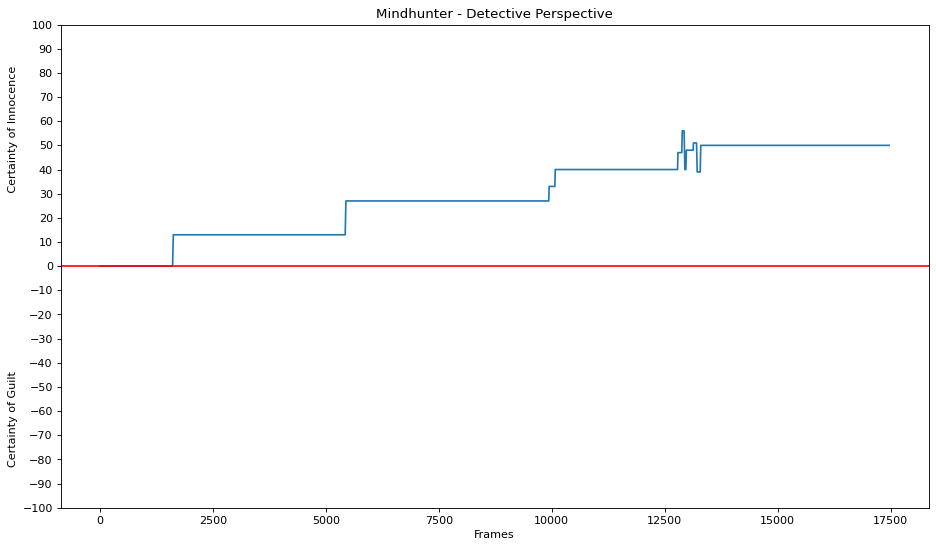

In [283]:
from matplotlib.pyplot import figure
%matplotlib inline
os.chdir("Clean Data")
certDF = pd.read_csv("SAN101_clean.csv")
index1 = certDF["Vid1Index"]
index2 = certDF["Vid2Index"]
index3 = certDF["Vid3Index"]
index4 = certDF["Vid4Index"]
index5 = certDF["Vid5Index"]
index6 = certDF["Vid6Index"]
index7 = certDF["Vid7Index"]
index8 = certDF["Vid8Index"]
index9 = certDF["Vid9Index"]



certainty1 = certDF["Vid1ConvRatings"]
certainty2 = certDF["Vid2ConvRatings"]
certainty3 = certDF["Vid3ConvRatings"]
certainty4 = certDF["Vid4ConvRatings"]
certainty5 = certDF["Vid5ConvRatings"]
certainty6 = certDF["Vid6ConvRatings"]
certainty7 = certDF["Vid7ConvRatings"]
certainty8 = certDF["Vid8ConvRatings"]
certainty9 = certDF["Vid9ConvRatings"]

figure(figsize=(14, 8), dpi=80)# Adapt the ticks on the x-axis

plt.plot(index1, certainty1)
# plt.xscale('log') 
plt.title("Mindhunter - Detective Perspective")
plt.xlabel("Frames")
plt.ylabel("Certainty of Guilt                                                   Certainty of Innocence")
tick_val = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]
# tick_lab = ['Guilty', '10k', '100k']
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.yticks(tick_val)
plt.show()

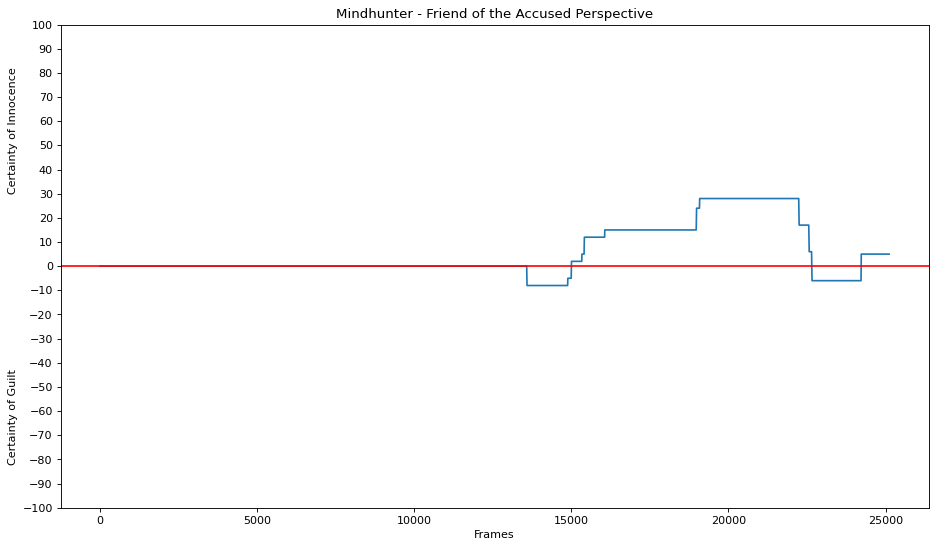

In [284]:
figure(figsize=(14, 8), dpi=80)
plt.plot(index2, certainty2)
# plt.xscale('log') 
plt.title("Mindhunter - Friend of the Accused Perspective")
plt.xlabel("Frames")
plt.ylabel("Certainty of Guilt                                                  Certainty of Innocence")
tick_val = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]
# tick_lab = ['Guilty', '10k', '100k']
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.yticks(tick_val)
plt.show()

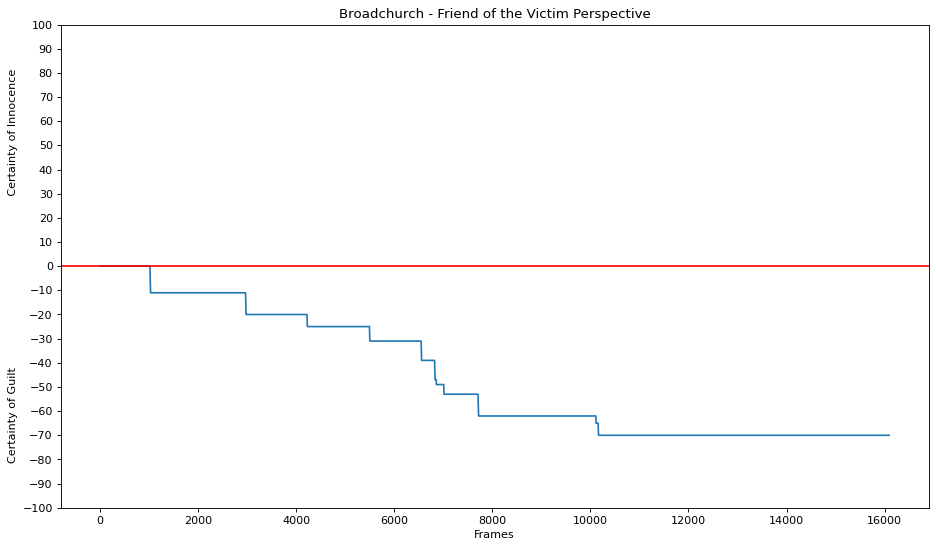

In [285]:
figure(figsize=(14, 8), dpi=80)
plt.plot(index3, certainty3)
# plt.xscale('log') 
plt.title("Broadchurch - Friend of the Victim Perspective")
plt.xlabel("Frames")
plt.ylabel("Certainty of Guilt                                                 Certainty of Innocence")
tick_val = [-100, -90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]
# tick_lab = ['Guilty', '10k', '100k']
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.yticks(tick_val)
plt.show()

# Animate it 
### Only do this for a snippet of the frames, ideally for made-up data - otherwise you will eat all of the memory and kill your laptop

In [ ]:
%matplotlib nbagg

style.use("default")
x = index3.tolist()
y = certainty3.tolist()

fig, ax = plt.subplots()
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel("Video Progression")
plt.ylabel("Certainty")
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 250, -60, 40])
    return line,

ani = FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('certainty.gif')
plt.show()

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
